In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('../Data/02_Clean.csv')

107669.09501445087


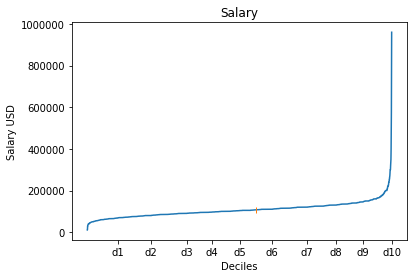

In [2]:
# Salary mean + salary decile
labels = ["d1", "d2","d3", "d4","d5", "d6","d7", "d8","d9", "d10"]
salaryMean = data.SalaryUSD.mean()
salarySort = data.SalaryUSD.sort_values()
salarySort = salarySort.values
salaryDecile = pd.qcut(salarySort, 10, labels=labels)
deciles = salaryDecile.value_counts()

xMean = -1
for i, x in enumerate(salarySort) :
    if x < salaryMean :
        xMean = i

newDeciles = []
save = 0
for x in deciles :
    save += x
    newDeciles.append(save)

salaryPlot = sns.lineplot(data=salarySort)
salaryPlot.set_xticks(newDeciles)
salaryPlot.set_xticklabels(labels)
salaryPlot.set_ylabel("Salary USD")
salaryPlot.set_xlabel("Deciles")
salaryPlot.ticklabel_format(style='plain', axis="y")
salaryPlot.plot(xMean, salaryMean, marker='|')
salaryPlot.set_title("Salary")
print(salaryMean)
print("Ici on peut voir chaque déciles ainsi que la médiane qui est représenté par le tiret rouge")

/home/apprenant/American-Dream/env/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/apprenant/American-Dream/env/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
Représentation des salaire par poste


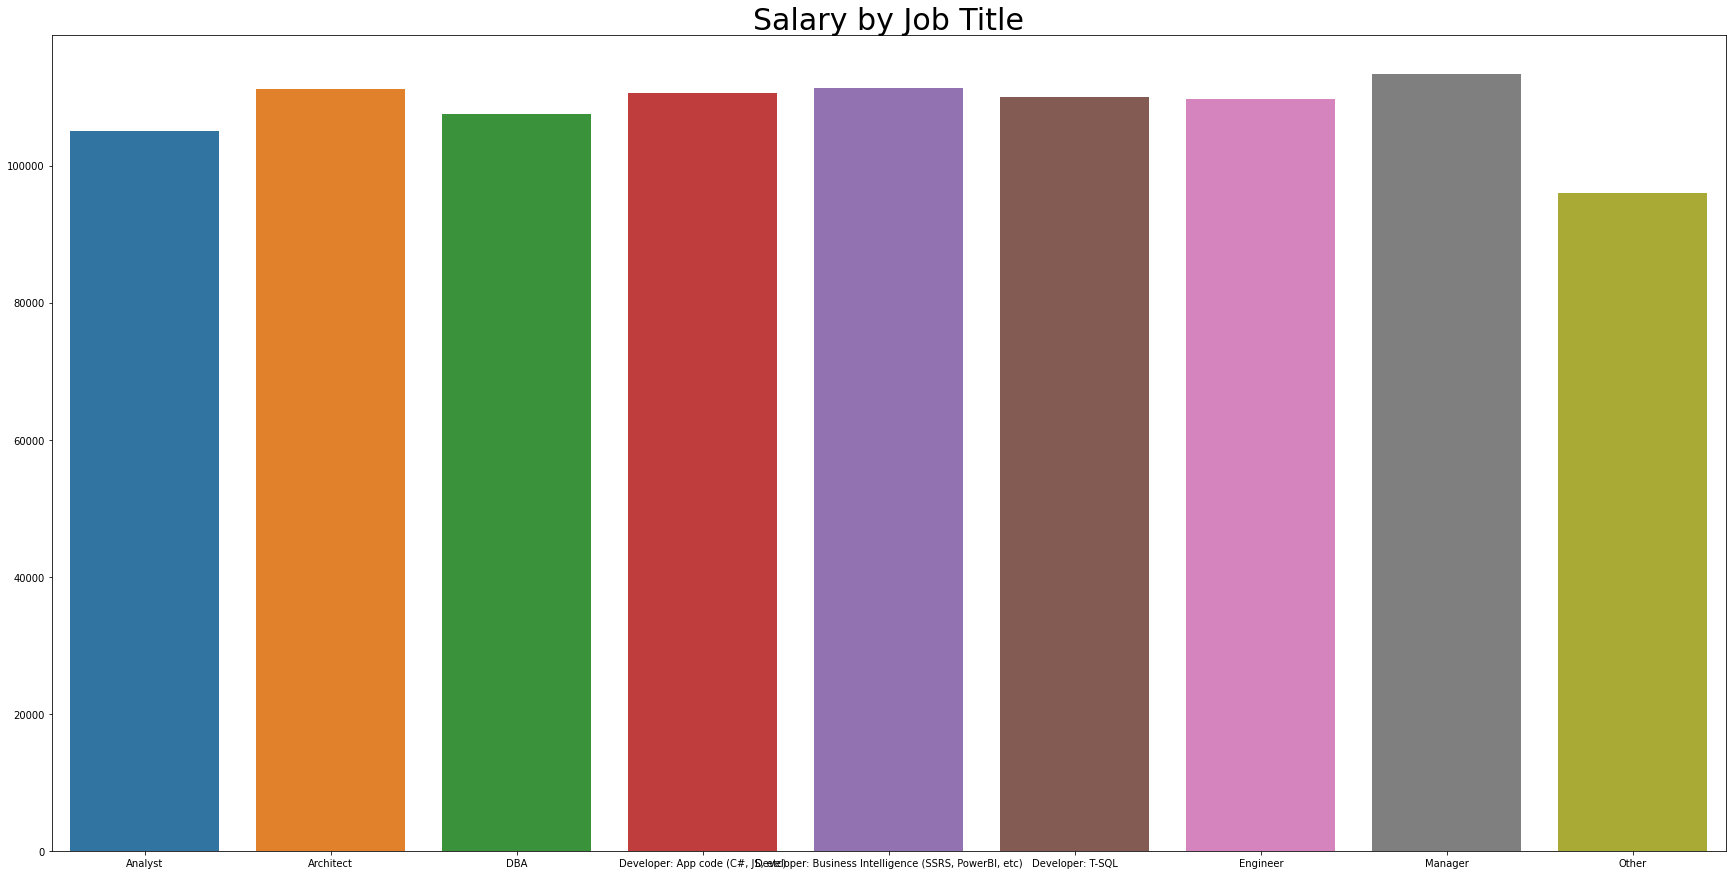

In [24]:
# Salary by job title
salaryJobs = data[["SalaryUSD", "JobTitle"]]
countJT = salaryJobs.value_counts("JobTitle")

# Remplace tout les postes avec moins de 100 représentation par Other

OtherList = []
for x  in countJT.keys() :
    if countJT[x] < 100 :
        OtherList.append(x)
salaryJobs.JobTitle.loc[salaryJobs.JobTitle.isin(OtherList)] = "Other"

# Réunis les métiers par JobTitle et calcule la moyenne de salaire

groupSJ = salaryJobs.groupby("JobTitle")
salaryMeanByJobs = {}
for x in groupSJ :
    salaryMeanByJobs[x[0]] = x[1].SalaryUSD.mean()

keys = list(salaryMeanByJobs.keys())
values = list(salaryMeanByJobs.values())
salaryJobPlot = sns.barplot(x=keys, y=values)
salaryJobPlot.figure.set_size_inches(30,15)
salaryJobPlot.set_title("Salary by Job Title", fontsize=30)

print("Représentation des salaire par poste")

9


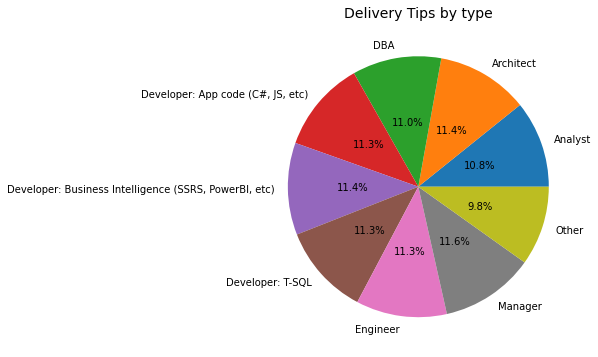

In [32]:
# Job repartition
#Using matplotlib
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=values, autopct="%.1f%%", labels=keys, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14)
pie.savefig("DeliveryPieChart.png")

Text(0.5, 1.0, 'Salary by nb of companies')

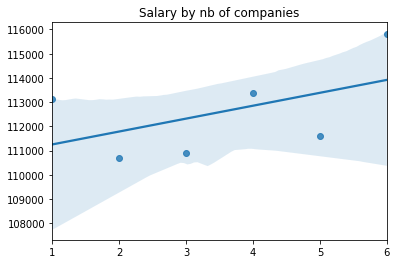

In [5]:
# Salary by nb of companies
slrbynbcomp = data[["SalaryUSD", "HowManyCompanies"]]
groupSC = slrbynbcomp.groupby("HowManyCompanies")

compMean = {}
for x in groupSC :
    if x[0] > 0 :
        compMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(compMean.keys())
values = list(compMean.values())

salaryCompany = sns.regplot(x=keys, y=values)
salaryCompany.set_title("Salary by nb of companies")

print("On peut voir qu'avoir plusieurs companies hausse légérement le salaire")

Text(0.5, 1.0, 'Salary by team size')

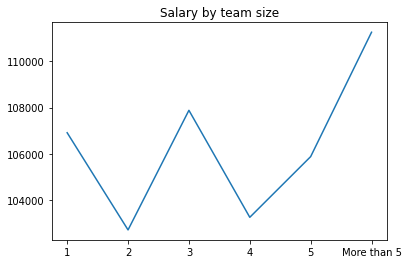

In [6]:
#Salary by team size
slrbyTeampSize = data[["SalaryUSD", "OtherPeopleOnYourTeam"]]
groupTeamSize = slrbyTeampSize.groupby("OtherPeopleOnYourTeam")

Teammean = {}
for x in groupTeamSize :
    if x[0] != "None" :
        Teammean[x[0]] = x[1].SalaryUSD.mean()

salaryByTeamPlot = sns.lineplot(data=Teammean)
salaryByTeamPlot.set_title("Salary by team size")

print("A priori la taille de l'équipe agis bénéfiquement sur le salaire")

Text(0.5, 1.0, 'Salary by years')

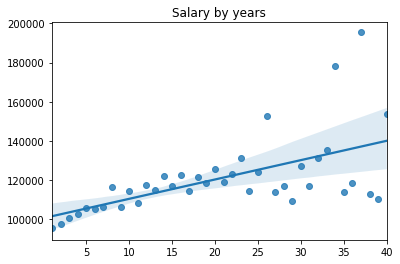

In [7]:
#Salary by years
slrbyYears = data[["SalaryUSD", "YearsWithThisTypeOfJob", "Gender"]]
groupYears = slrbyYears.groupby("YearsWithThisTypeOfJob")

YearsMean = {}
for x in groupYears :
    if x[0] != "None" :
        YearsMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(YearsMean.keys())
values = list(YearsMean.values())

yearsPlot = sns.regplot(x=keys, y=values)
yearsPlot.set_title("Salary by years")

print("L'ancienneté est aussi moteur d'augmentation")

Text(0.5, 1.0, 'Salary by gender')

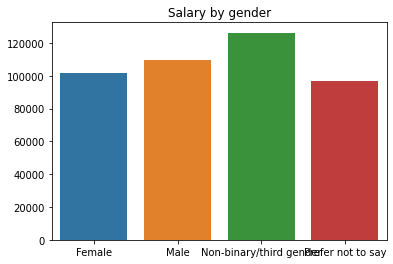

In [8]:
# Salary by gender

slrByGender = data[["SalaryUSD", "Gender"]]
groupGender = slrByGender.groupby("Gender")

GenderMean = {}
for x in groupGender :
    GenderMean[x[0]] = x[1].SalaryUSD.mean()

keys = list(GenderMean.keys())
values = list(GenderMean.values())

genderBarPlot = sns.barplot(x=keys, y=values)

genderBarPlot.set_title("Salary by gender")

print("on peut voir que les hommes gagnent un peu plus que les femmes, mais moins que les personnes non-binaire")

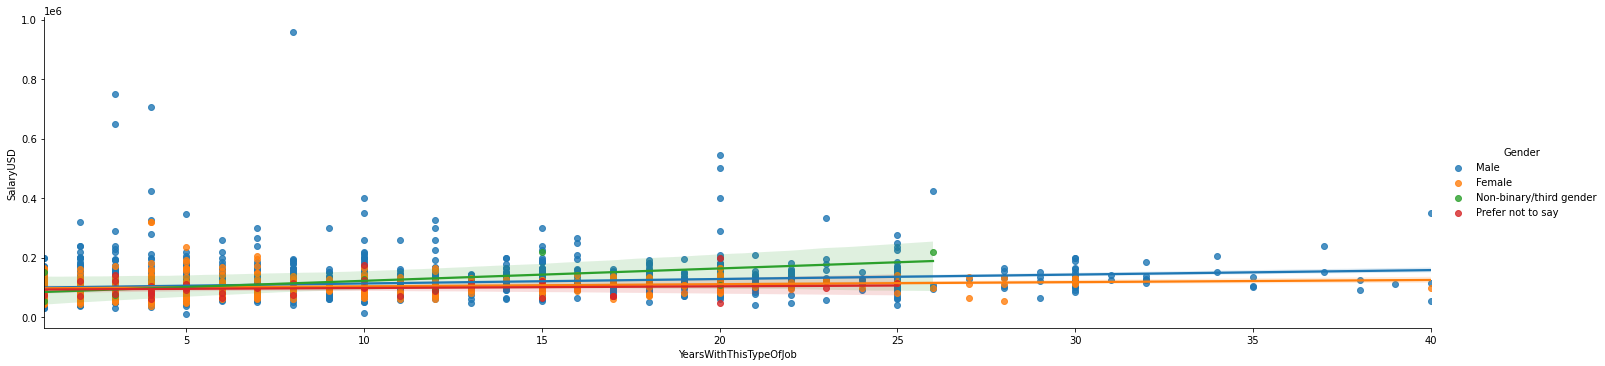

In [9]:
# Salary Years Gender
salaryYearsGender = sns.lmplot(x="YearsWithThisTypeOfJob", y="SalaryUSD", hue="Gender", data=slrbyYears, height=5, aspect=4)